For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

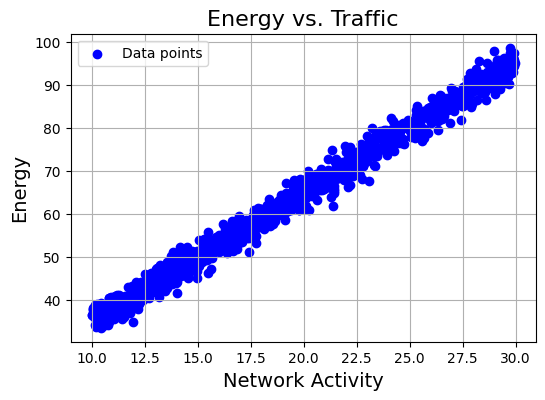

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

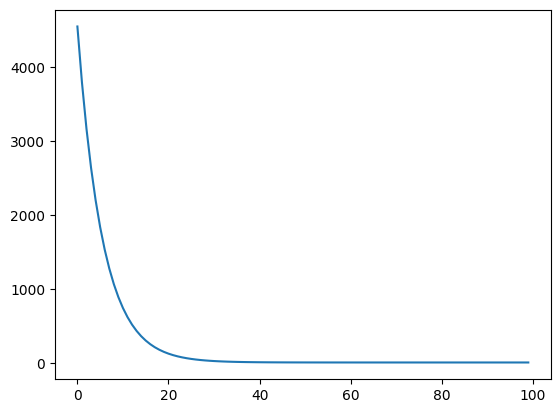

In [9]:
lr = LinearRegression(epochs=100, lr=1e-4)

losses = lr.fit(data['Net_Activity'], data['Energy'])
plt.plot(losses)

preds = lr.predict(data['Net_Activity'])


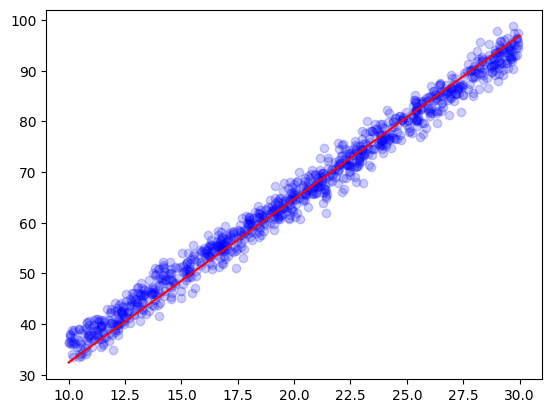

In [10]:
X = np.array([10, 30])
y = lr.predict(X)
plt.plot(X, y, c='red')
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', alpha=0.2, label='Data points')

In [102]:
print(lr.W.round(4), lr.b.round(4))

3.2244 0.2201


<h3>Discussion</h3>

**a)**

Energy consumption formula: energy = net_activity * W + b = 3.2244x + 0.2201

<br><br>

**b)**

Linear regression with MSE is an unbiased estimator.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [207]:
data = pd.read_csv('mission2.csv')
data['x2'] = data['x0'] * data['x1']

train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

feats = ['x2']

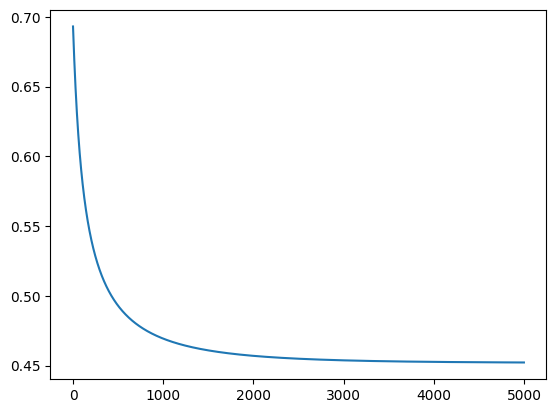

In [127]:
lr = LinearRegression(epochs=5000, lr=5e-5)

losses = lr.fit(train[feats], train['y'])
plt.plot(losses)


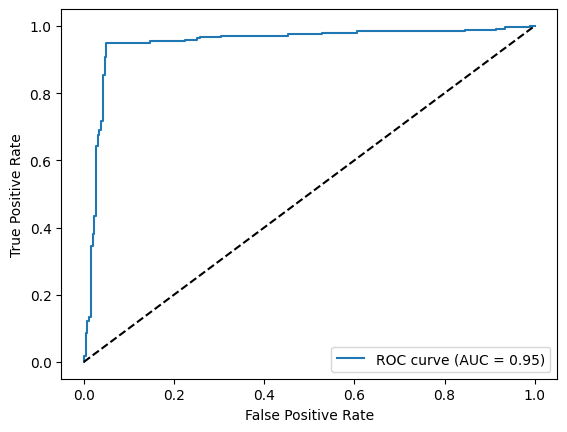

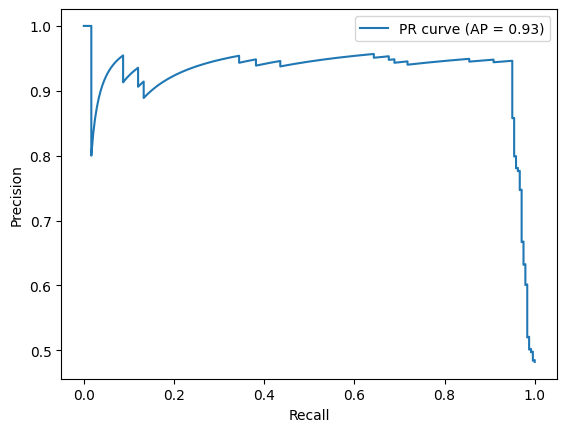

In [209]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

test_preds = lr.predict(test[feats])

fpr, tpr, thresholds = roc_curve(test['y'], test_preds) 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, thresholds = precision_recall_curve(test['y'], test_preds)
ap = average_precision_score(test['y'], test_preds)

plt.plot(recall, precision, label=f'PR curve (AP = {ap:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

[[244  15]
 [ 12 229]]


0.946

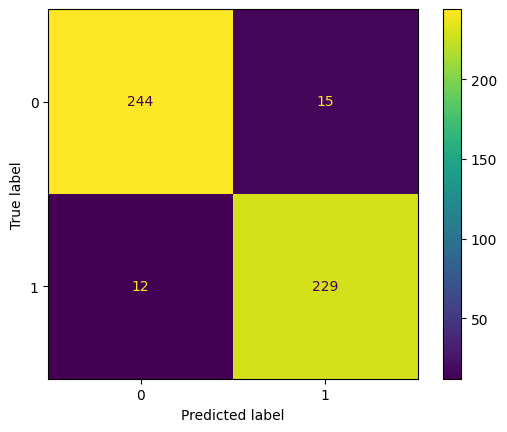

In [210]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
test_preds = lr.predict(test[feats])

thr = 0.5

cm = confusion_matrix(test['y'], test_preds > thr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(cm)
accuracy_score(test['y'], test_preds > thr)

In [ ]:
print('Corr(y, x0) =', train['y'].corr(train['x0']).item())
print('Corr(y, x1) =', train['y'].corr(train['x1']).item())
print('Corr(y, x0*x1) =', train['y'].corr(train['x0'] * train['x1']).item())

Corr(y, x0) = -0.0719890904214643
Corr(y, x1) = 0.007628979291212734
Corr(y, x0*x1) = -0.5331063572897665


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=2)
clf.fit(train[feats], train['y'])


<h3>Discussion</h3>

**a)**

The model had poor performance on using x0 and x1, since y had neglible linear correlation with both. However y was strongly linearly correlated with the product x0*x1, so using this as the only feature with a threshold of 0.5 gave an accuracy of 0.948 on training data and 0.946 on test data.

**b)**

Inductive bias: Linear regression assumes that the target can be expressed as a linear combinations of the features plus a bias. Logistic regression assumes that the target is between 0 and 1.

**c)**

SK-Learn DecisionTreeClassifier was able to achieve 0.892 with no extra features. Decision tree classifiers are well-fitted for this task because 1) its classification and 2) the feature-target relation is highly correlated with a combination of two features, which decision trees can capture. Intuitively a decision tree model makes sense: from the plotting x0*x1 against y we see that negative product is associated with class = 1 and vice versa. This can be modelled as a decision tree: x0 > 0 and x1 > 0 with four leaf nodes, where one yes and no maps to 1 and two nos or two yeses maps to 0.

**d)**

ROC curve plotted above

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [7]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

feat = 'data_stream_3'
train[feat] = train[feat].mul(1e3).astype('int') % 2
test[feat] = test[feat].mul(1e3).astype('int') % 2


feats = train.drop(columns=['target']).columns.tolist()



In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


for model in [DecisionTreeClassifier(max_depth=6), RandomForestClassifier(n_estimators=100, max_depth=10)]:
    clf = model
    clf.fit(train[feats], train['target'])


    X_test = test[feats]
    y_test = test['target']
    preds = clf.predict_proba(X_test)[:, 1]

    print("Test ROC AUC:", model.__class__.__name__, round(roc_auc_score(y_test, preds), 10))

Test ROC AUC: DecisionTreeClassifier 0.735397365
Test ROC AUC: RandomForestClassifier 0.7266807276


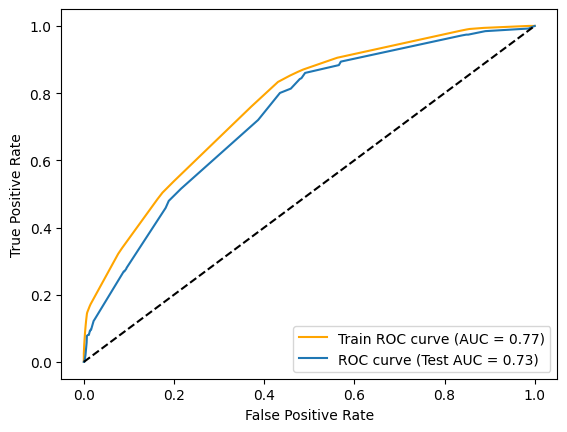

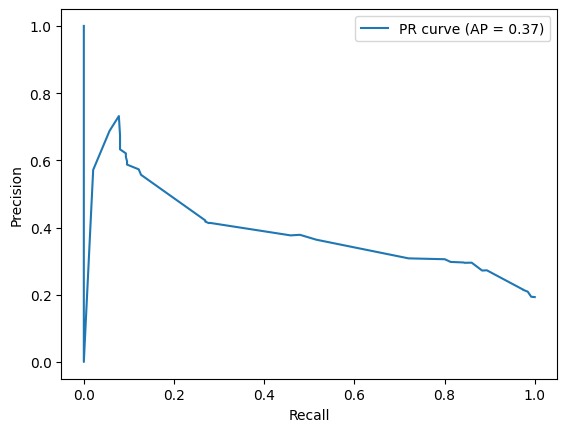

In [9]:


from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score 
import matplotlib.pyplot as plt

train_preds = clf.predict_proba(train[feats])[:, 1]
test_preds = clf.predict_proba(test[feats])[:, 1]

train_fpr, train_tpr, thresholds = roc_curve(train['target'], train_preds) 
train_roc_auc = auc(train_fpr, train_tpr)
fpr, tpr, thresholds = roc_curve(test['target'], test_preds) 
roc_auc = auc(fpr, tpr)

plt.plot(train_fpr, train_tpr, label=f'Train ROC curve (AUC = {train_roc_auc:.2f})', c='orange')
plt.plot(fpr, tpr, label=f'ROC curve (Test AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, thresholds = precision_recall_curve(test['target'], test_preds)
ap = average_precision_score(test['target'], test_preds)

plt.plot(recall, precision, label=f'PR curve (AP = {ap:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

<h3>3)</h3>

a)

After decoding the data_stream_3, I still had an ROC AUC below 0.72, however it was close enough that I thought finetuning hyperparameters could put it over 0.72. For this I used sklearns GridSearchCV, and iteratively adjusted the search space. However this only brought me to 0.719933 < 0.72. This was because I had decoded the signal incorrectly, using floor(x) instead of int(x), which caused some negative values to be rounded down instead of up due to machine error in multipyling by 1000. After fixing the decoding, only max_depth needed to be configured to go above 0.72 AUC.

b)

ROC plots TP over FP for all thresholds, visualizing the tradeoff between classifying conservatively vs liberally. The AUC represents the probability of the model assigning a higher value to a random false then a random positive from the given dataset. This makes ROC AUC suitable for binary classification, especially with class imbalance. Since ROC curve visualizes performance of thresholds, it can also help in choosing an appropriate threshold value. In our case we had a binary target with a slight class imbalance and we were more interested in the models ability to learn the pattern, than potential accuracy for a speific threshold. Therefore, ROC AUC was a suitable metric.

c) 

Test ROC AUC: DecisionTreeClassifier 0.735397365
Test ROC AUC: RandomForestClassifier 0.7266807276
With some slight hyperparamter tuning of the random forest, it performs better than the decision tree. Notably, the random forest hyperparams have had far less fine tuning than the decision tree.


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [8]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [9]:
fixed_test = test.copy()

for i in range(2, len(test.columns)):
    fixed_test.iloc[:, i] = test.iloc[:, i-1]

fixed_test.iloc[:, 1] = test.iloc[:, 16]

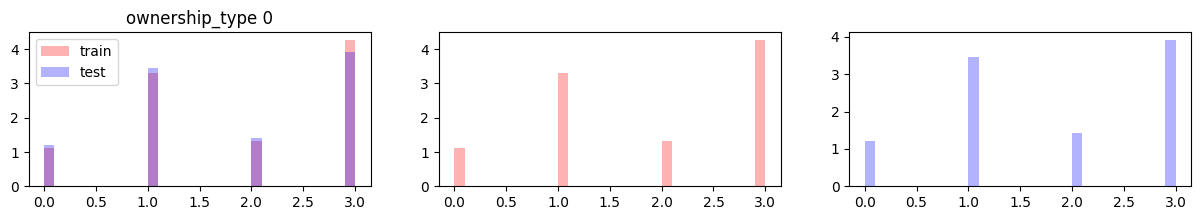

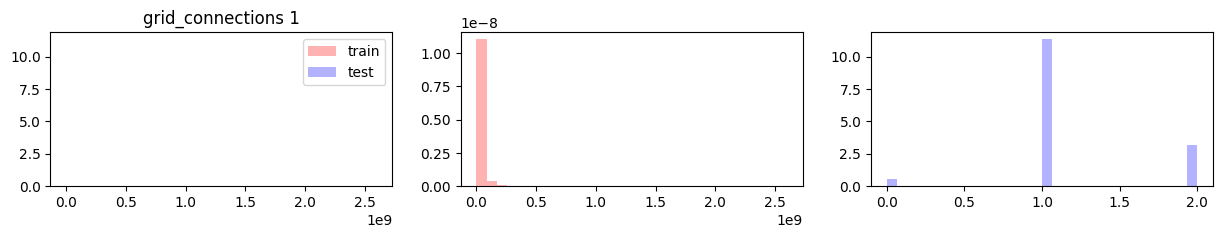

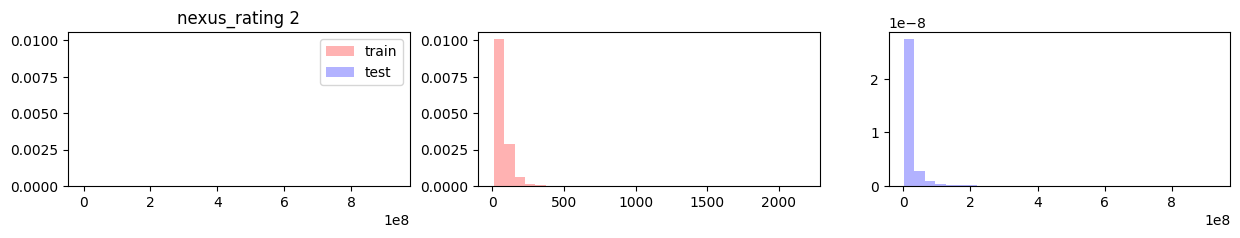

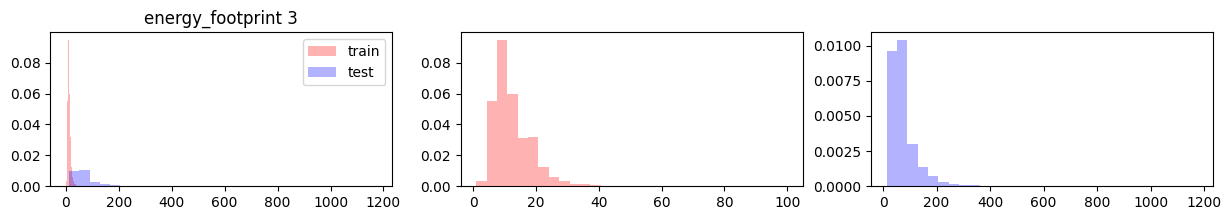

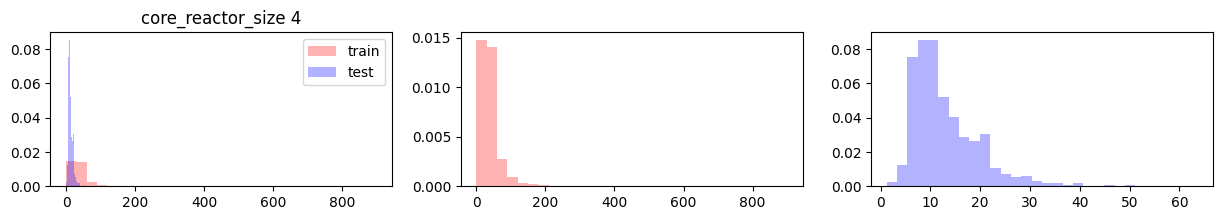

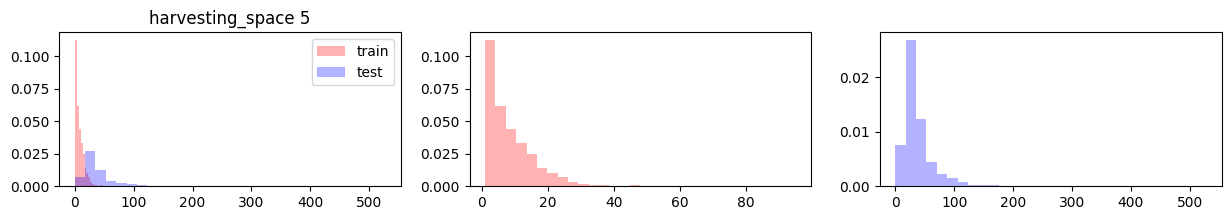

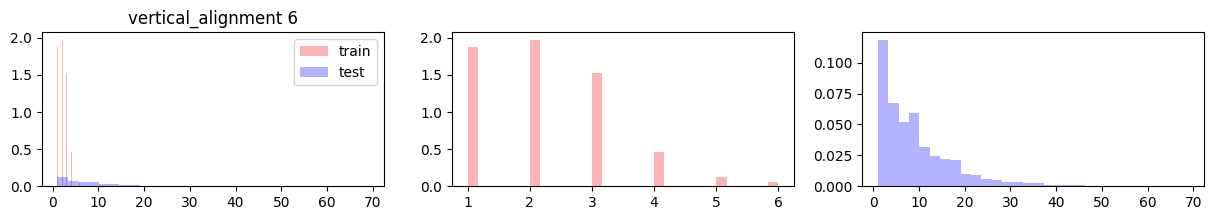

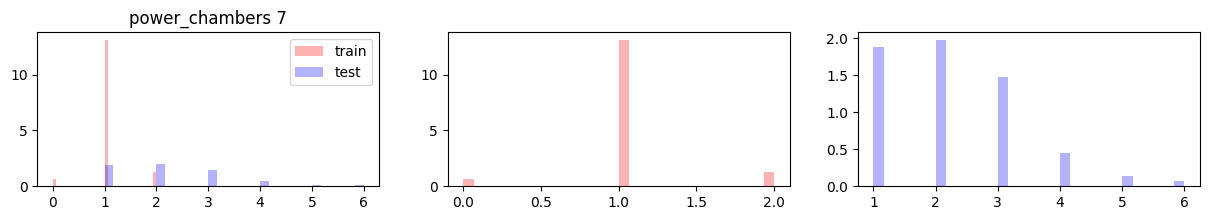

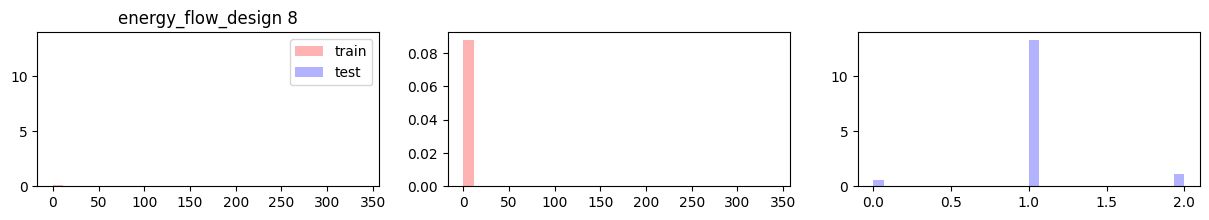

KeyboardInterrupt: 

In [44]:
for col in train.columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 2])
    ax1.hist(train[col], color='red', alpha=0.3, bins=30, density=True, label='train')
    ax1.hist(fixed_test[col], color='blue', alpha=0.3, bins=30, density=True, label='test')
    ax1.set_title(col + ' ' + str(train.columns.tolist().index(col)))
    ax1.legend()

    ax2.hist(train[col], color='red', alpha=0.3, bins=30, density=True)
    ax3.hist(fixed_test[col], color='blue', alpha=0.3, bins=30, density=True)
    plt.show()


In [29]:

cleaned_train = train.copy()
cleaned_test = fixed_test.copy()
# create NA indicator columns
for col in train.columns[train.isna().sum() > 0]:
    cleaned_train[col + "_was_na"] = train[col].isna().astype(int)
    cleaned_test[col + "_was_na"] = fixed_test[col].isna().astype(int)

# fill missing values
fill = train.median()
cleaned_train = train.fillna(fill).join(cleaned_train[[c for c in cleaned_train if c.endswith("_was_na")]])
cleaned_test = fixed_test.fillna(fill).join(cleaned_test[[c for c in cleaned_test if c.endswith("_was_na")]])





In [30]:
from sklearn.preprocessing import PolynomialFeatures


y_train = cleaned_train['nexus_rating']
X_train = cleaned_train.drop(columns=['nexus_rating'])

y_test = cleaned_test['nexus_rating']
X_test = cleaned_test.drop(columns=['nexus_rating'])

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_inter_train = poly.fit_transform(X_train)

feature_names = poly.get_feature_names_out(X_train.columns)
X_train = pd.DataFrame(X_inter_train, columns=feature_names, index=X_train.index)

X_inter_test = poly.fit_transform(X_test)
feature_names = poly.get_feature_names_out(X_test.columns)
X_test = pd.DataFrame(X_inter_test, columns=feature_names, index=X_test.index)




In [47]:
import xgboost as xgb

model = xgb.XGBRegressor(
    max_depth=6,
    n_estimators=1000,
    learning_rate=0.025,
    subsample=0.6,
    colsample_bytree=0.65,
    objective='reg:squarederror',
)




y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)

estimator = model
test_preds = np.expm1(estimator.predict(X_test))
train_preds = np.expm1(estimator.predict(X_train))

print('Train RMSLE: ', rmsle(y_train, train_preds))
print('Test RMSLE: ', rmsle(y_test, test_preds))



Train RMSLE:  0.19622101447349857
Test RMSLE:  0.29344786351932145


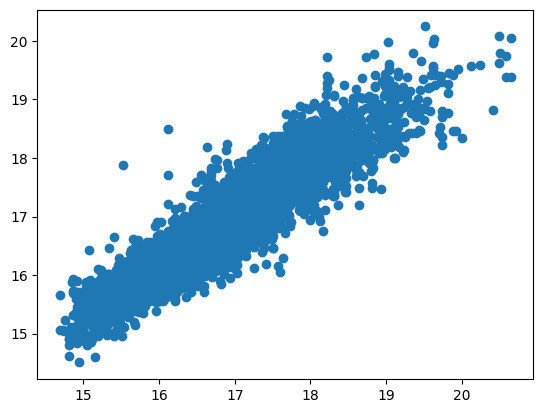

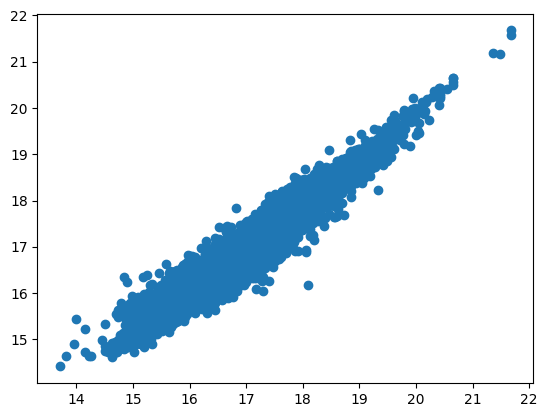

In [32]:
plt.scatter(np.log1p(y_test), np.log1p(test_preds))
plt.show()
plt.scatter(np.log1p(y_train), np.log1p(train_preds))

<h3>4) Discussion</h3>

a)

After fixing the order of the columns in the test data, the model still wasnt performing well enough. To improve performance I did four things: data cleaning, feature engineering, hyperparam tuning, and model selection.

Data cleaning: Many columns had missing values, I tried filling with mean, median, and 0. All gave similar performance but, median performed best.

Feature engineering: I created binary features for each original columns representing if the value had originally been na. This was done to preserve all possible information, and could be afforded since the training data had very many observations. In addition, I created interaction features of polynomal order 2. I did not include squared features since the models I was using could already learn quadratic patterns. I tried a little feature selection, using correlation cutoff, but since it didnt improve results and we have so many training observations, I decided to keep all features. The na handling and interaction features both gave slight performance bossts.

Hyperparam tuning: I used GridSearchCV iteratively to tune hyperparams. While doing this I was comparing training performacne to test performance to monitor overfitting.

Model selection: I tried XGBoost and DecisionTree, with XGBoost giving better results.






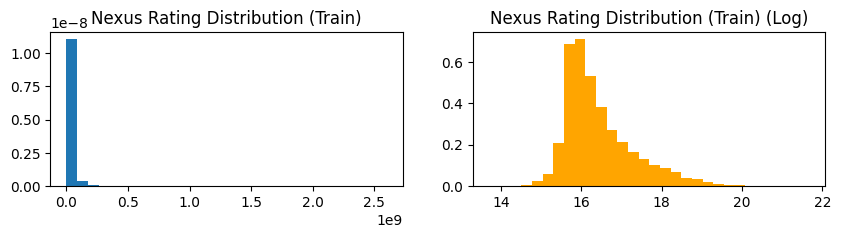

In [48]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

ax1.hist(train['nexus_rating'], density=True, bins=30)
ax1.set_title('Nexus Rating Distribution (Train)')

ax2.hist(np.log1p(train['nexus_rating']), density=True, bins=30, color='orange')
ax2.set_title('Nexus Rating Distribution (Train) (Log)')
plt.show()



b)

RMSLE evaluates predictions relative to actual, looking at relative value instead of absolute like RMSE. This makes it suitable for datasets with outliers and prevents outliers by blowing up the metric. Plotting the target distributution (see above) we can tell that it has many outliers. Comparing to the log transform, we can tell that the log transformed distribution is easier to work with. Since the model was to predict positive numbers, I log tranformed the target before training the model, and exponentiated the model outputs before calculating RMSLE. Therefore, during training the target distribution was already log so squared error worked well.

<Axes: title={'center': 'Feature Importance'}>

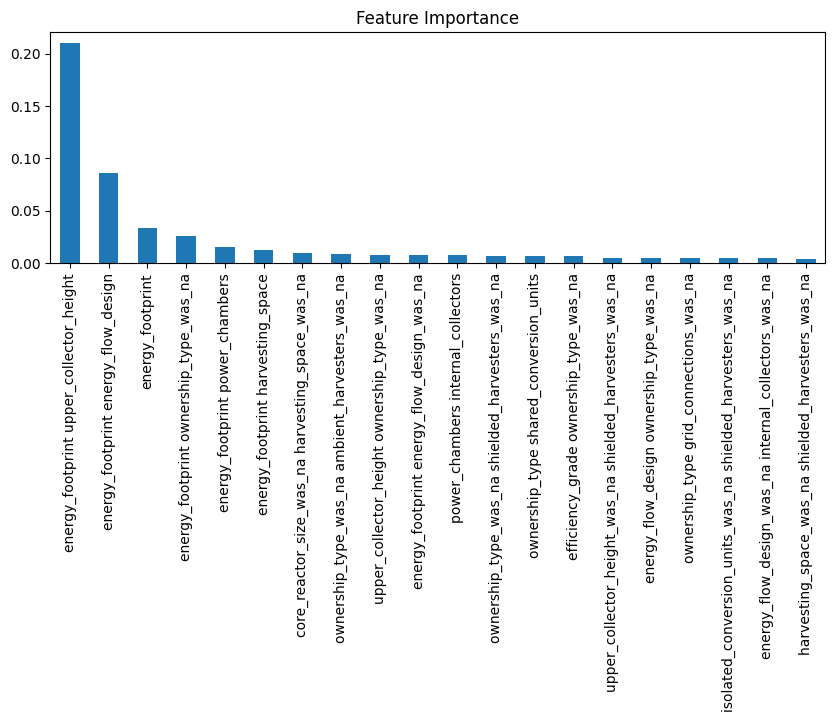

In [57]:
feature_importance = pd.Series(model.feature_importances_, index=feature_names)
feature_importance = feature_importance.sort_values(ascending=False)

feature_importance.head(20).plot(kind='bar', figsize=(10, 3), title='Feature Importance')


c)

From the feature importance plot above we can see that energy_footprint_upper_collector_height contributed by far the largest, with energy_footprint * flow_design and energy_footprint also contributing significantly. Interestingly, energy_footprint * owner_type_was_na also contributes significantly. From this we can tell that some features did in fact interract and that the fact that a column was na was information in itself. Further we can tell that most of the columns dont contribute significantly and could probably be removed without large performance loss.

d)

For ensembling I just tried XGBoost and Random Forest regressors since they work with most regressions data. Since this gave good results, I didnt try anything else.

e)

In real life I would split the data I have into train, validation and test.

Train: for model training and feature selection
Validation: for hyperparam tuning, model selection and overfitting monitoring
Test: would be left untouched until the end when it would be used to test generalization on unseen data.